In [3]:
import os
import pandas as pd
from tflearn.datasets import imdb
import seaborn as sns
import matplotlib as mpl
import pickle as pkl
import torch

In [4]:
from cell import utils, plot_utils

In [259]:
model_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/cell/DMGI/saved_model"
data_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/cell/DMGI/data/"

### JSD directed graph

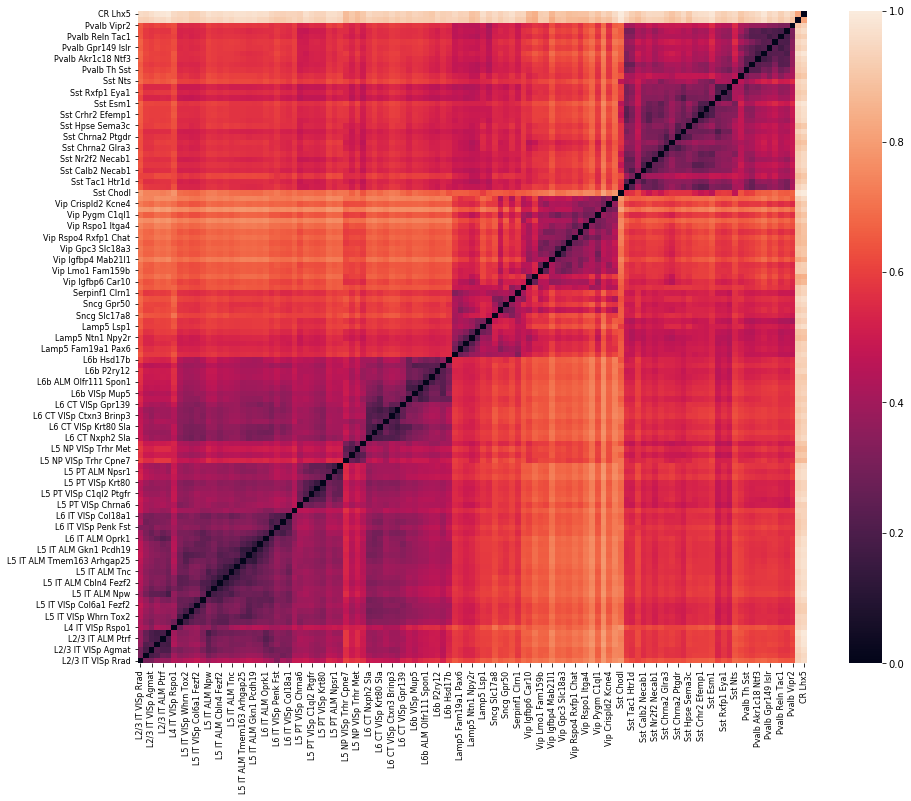

In [260]:
jsd = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/jsd_python_recomputed.csv", index_col="Unnamed: 0")
fig = plt.figure(figsize=(15,12))
ax = sns.heatmap(jsd)
ax.tick_params(labelsize=8)
ax.invert_yaxis()

### Node features

In [261]:
FACS_cl_med = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/FACS.cl.med.45kgenes.csv", index_col="Unnamed: 0")
FACS_cl_med = FACS_cl_med.T
FACS_cl_med.head()

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
CR Lhx5,0.000000,0.0,2.703152,3.623981,0.213711,1.044439,0.438593,0.000000,1.425090,5.112716,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2/3 IT ALM Macc1 Lrg1,0.016386,0.0,6.713822,6.307422,0.399133,1.167678,1.776012,0.000000,6.349794,5.209173,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2/3 IT ALM Ptrf,0.023386,0.0,6.710936,6.277851,0.218325,1.178602,1.876302,0.005734,6.532368,4.964469,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2/3 IT ALM Sla,0.018863,0.0,6.811912,6.319875,0.334150,1.681379,1.854045,0.000000,6.328418,5.276135,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2/3 IT VISp Adamts2,0.092975,0.0,6.699275,5.491403,0.273496,1.618319,1.859952,0.002955,5.438338,5.285550,...,0.0,0.003406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
FACS_cl_med.shape

(117, 45768)

In [263]:
jsd.shape

(117, 117)

Lets make sure they have the same labels

In [264]:
[i for i in FACS_cl_med.index.tolist() if i not in jsd.index.tolist()]

[]

In [265]:
select_cl = FACS_cl_med.index

In [266]:
#tmp = jsd.reindex(FACS_cl_med.index)
# for t in select_cl:
#     print(sum(tmp.loc[t] == jsd.loc[t]))

In [267]:
jsd = jsd.reindex(FACS_cl_med.index)

In [268]:
jsd = jsd[select_cl]
jsd.head()

,CR Lhx5,L2/3 IT ALM Macc1 Lrg1,L2/3 IT ALM Ptrf,L2/3 IT ALM Sla,L2/3 IT VISp Adamts2,L2/3 IT VISp Agmat,L2/3 IT VISp Rrad,L4 IT VISp Rspo1,L5 IT ALM Cbln4 Fezf2,L5 IT ALM Cpa6 Gpr88,...,Vip Igfbp4 Mab21l1,Vip Igfbp6 Car10,Vip Igfbp6 Pltp,Vip Lect1 Oxtr,Vip Lmo1 Fam159b,Vip Lmo1 Myl1,Vip Ptprt Pkp2,Vip Pygm C1ql1,Vip Rspo1 Itga4,Vip Rspo4 Rxfp1 Chat
CR Lhx5,0.000000,0.994837,0.986370,0.983243,0.950134,0.964855,0.960910,0.955185,0.957255,0.969032,...,0.860279,0.869183,0.845282,0.894256,0.920733,0.928208,0.879929,0.896126,0.894368,0.889405
L2/3 IT ALM Macc1 Lrg1,0.994837,0.000000,0.184492,0.175146,0.258561,0.200723,0.374299,0.395470,0.278471,0.313066,...,0.754944,0.671686,0.716743,0.703529,0.679543,0.678277,0.691484,0.694673,0.742182,0.719702
L2/3 IT ALM Ptrf,0.986370,0.184492,0.000000,0.184497,0.270566,0.199509,0.380890,0.416107,0.321687,0.331503,...,0.740285,0.655666,0.698911,0.692209,0.671975,0.668220,0.681041,0.685324,0.732249,0.710728
L2/3 IT ALM Sla,0.983243,0.175146,0.184497,0.000000,0.214161,0.226926,0.368229,0.434578,0.335988,0.347523,...,0.749700,0.666163,0.708695,0.704970,0.678518,0.680090,0.689047,0.693299,0.741993,0.717168
L2/3 IT VISp Adamts2,0.950134,0.258561,0.270566,0.214161,0.000000,0.188236,0.301102,0.400160,0.360651,0.397808,...,0.717738,0.635279,0.675941,0.680206,0.655926,0.661542,0.659374,0.663692,0.711239,0.685294


### Save the data in pickel format

In [269]:
data = {}
data['jsd_1'] = np.array(1-jsd)
data['feature'] = np.array(FACS_cl_med)
data['train_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['test_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['val_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))

In [270]:
label = []
for i in range(len(select_cl)):
    for j in range(len(select_cl)):
        if i == j:
            label.append(1)
        else:
            label.append(0)
data['label'] = np.array(label).reshape(len(select_cl),len(select_cl))

In [271]:
data

{'jsd_1': array([[1.        , 0.0051629 , 0.01363039, ..., 0.10387404, 0.10563243,
         0.11059509],
        [0.0051629 , 1.        , 0.81550843, ..., 0.30532657, 0.25781794,
         0.2802985 ],
        [0.01363039, 0.81550843, 1.        , ..., 0.31467565, 0.26775105,
         0.28927249],
        ...,
        [0.10387404, 0.30532657, 0.31467565, ..., 1.        , 0.71375025,
         0.71244451],
        [0.10563243, 0.25781794, 0.26775105, ..., 0.71375025, 1.        ,
         0.74551171],
        [0.11059509, 0.2802985 , 0.28927249, ..., 0.71244451, 0.74551171,
         1.        ]]),
 'feature': array([[0.        , 0.        , 2.70315206, ..., 0.        , 0.        ,
         0.        ],
        [0.01638613, 0.        , 6.71382194, ..., 0.        , 0.        ,
         0.        ],
        [0.02338557, 0.        , 6.71093626, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.06123941, 0.        , 6.05764988, ..., 0.        , 0.        ,
         0.   

In [272]:
import pickle
with open('/Users/fahimehb/Documents/NPP_GNN_project/dat/jsd.pkl', 'wb') as handle:
    pickle.dump(data, handle)

In [273]:
cldf = pd.read_csv("/Users/fahimehb/Documents/GNN/dat/cl_df_150cl.csv", index_col="Unnamed: 0")
cldf = cldf[cldf["cluster_label"].isin(select_cl)]
cldf = cldf.set_index("cluster_label")
cldf = cldf.reindex(select_cl)

## No attribute

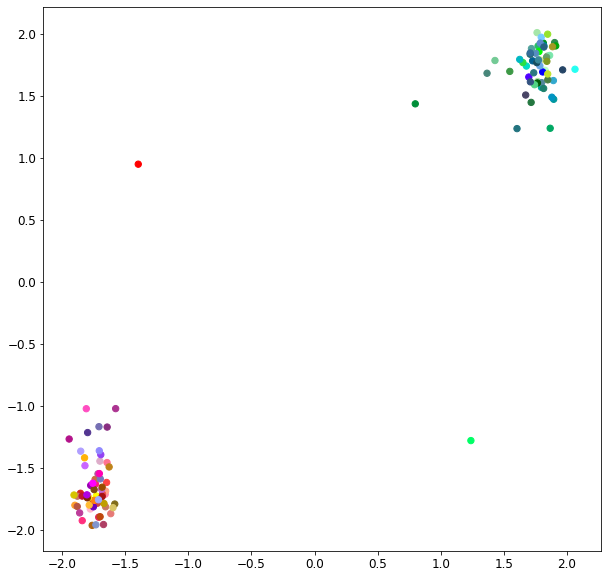

In [190]:
model_output = torch.load(os.path.join(model_dir, "best_jsd_DMGI_jsd_1.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=30, theta2=30)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2)

### With Attribute

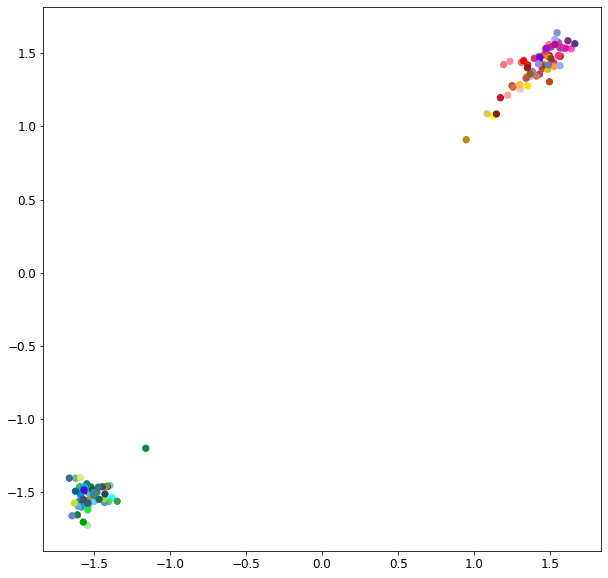

In [274]:
model_output = torch.load(os.path.join(model_dir, "best_jsd_DMGI_jsd_1.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=30, theta2=30)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2)

### For symmetric version of NPP network


In [297]:
edgelist_dir = utils.get_edgelist_dir(roi= "VISp", 
                                      layer= "test_layer", 
                                      project_name= "NPP_GNN_project")
edge_list = pd.read_csv(edgelist_dir + "/" + "edgelist0.csv")
for idx, row in edge_list.iterrows():
    if row['source'] != row['target']:
        edge_list = edge_list.append(
            pd.DataFrame([[row['target'], row['source'], row['weight']]],  columns=["source", "target", "weight"])
        )

for i in range(93):
    edge_list= edge_list.append(
            pd.DataFrame([[i, i, 1]],  columns=["source", "target", "weight"])
    )
df =edge_list.pivot(index="source", columns="target", values="weight")
df = np.array(df)

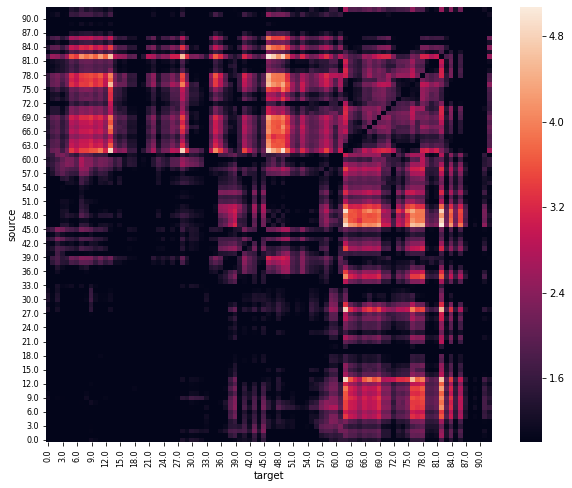

In [298]:
df =edge_list.pivot(index="source", columns="target", values="weight")
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(df)
ax.tick_params(labelsize=8)
ax.invert_yaxis()

In [300]:
cldf = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv")

In [301]:
select_cl = cldf['cluster_label'].tolist()

In [302]:
select_cl

['L2/3 IT VISp Rrad',
 'L2/3 IT VISp Adamts2',
 'L2/3 IT VISp Agmat',
 'L4 IT VISp Rspo1',
 'L5 IT VISp Hsd11b1 Endou',
 'L5 IT VISp Whrn Tox2',
 'L5 IT VISp Batf3',
 'L5 IT VISp Col6a1 Fezf2',
 'L5 IT VISp Col27a1',
 'L6 IT VISp Penk Col27a1',
 'L6 IT VISp Penk Fst',
 'L6 IT VISp Col23a1 Adamts2',
 'L6 IT VISp Col18a1',
 'L6 IT VISp Car3',
 'L5 PT VISp Chrna6',
 'L5 PT VISp Lgr5',
 'L5 PT VISp C1ql2 Ptgfr',
 'L5 PT VISp C1ql2 Cdh13',
 'L5 PT VISp Krt80',
 'L5 NP VISp Trhr Cpne7',
 'L5 NP VISp Trhr Met',
 'L6 CT Nxph2 Sla',
 'L6 CT VISp Krt80 Sla',
 'L6 CT VISp Nxph2 Wls',
 'L6 CT VISp Ctxn3 Brinp3',
 'L6 CT VISp Ctxn3 Sla',
 'L6 CT VISp Gpr139',
 'L6b Col8a1 Rprm',
 'L6b VISp Mup5',
 'L6b VISp Col8a1 Rxfp1',
 'L6b P2ry12',
 'L6b VISp Crh',
 'L6b Hsd17b',
 'Lamp5 Krt73',
 'Lamp5 Fam19a1 Pax6',
 'Lamp5 Fam19a1 Tmem182',
 'Lamp5 Ntn1 Npy2r',
 'Lamp5 Plch2 Dock5',
 'Lamp5 Lsp1',
 'Lamp5 Lhx6',
 'Sncg Slc17a8',
 'Sncg Vip Nptx2',
 'Sncg Gpr50',
 'Sncg Vip Itih5',
 'Serpinf1 Clrn1',
 'Serpi

In [303]:
FACS_cl_med = FACS_cl_med.reindex(select_cl)
FACS_cl_med

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
L2/3 IT VISp Rrad,0.006843,0.035905,5.963129,3.522792,0.482711,1.647741,1.364147,0.000000,4.462042,4.860779,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2/3 IT VISp Adamts2,0.092975,0.000000,6.699275,5.491403,0.273496,1.618319,1.859952,0.002955,5.438338,5.285550,...,0.0,0.003406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2/3 IT VISp Agmat,0.057856,0.000000,6.475640,5.713271,0.267773,1.008238,1.815932,0.000000,5.744427,5.131360,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L4 IT VISp Rspo1,0.030073,0.001378,5.703884,4.784834,0.161517,0.727086,1.793405,0.003867,5.148560,4.735417,...,0.0,0.000787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L5 IT VISp Hsd11b1 Endou,0.017485,0.000000,6.307842,5.890821,0.130490,1.262130,1.704538,0.000000,5.769690,5.262205,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pvalb Gpr149 Islr,0.071925,0.000000,5.659999,6.155856,0.176491,2.168822,1.888749,0.000000,5.744516,5.145068,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pvalb Reln Itm2a,0.054436,0.000000,5.885977,6.469020,0.151345,2.695519,2.426718,0.000000,6.202531,5.054514,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pvalb Reln Tac1,0.047841,0.005076,5.643716,6.445310,0.170276,2.326129,1.973457,0.000985,5.917232,5.348734,...,0.0,0.000816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pvalb Tpbg,0.103286,0.000000,5.938865,6.363655,0.156429,2.181706,1.999850,0.000000,5.900706,5.211326,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
FACS_cl_med.shape

(93, 45768)

In [305]:
data = {}
data['npp_1'] = np.array(df)
data['npp_2'] = np.array(df)
data['feature'] = np.array(FACS_cl_med)
data['train_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['test_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['val_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))

label = []
for i in range(len(select_cl)):
    for j in range(len(select_cl)):
        if i == j:
            label.append(1)
        else:
            label.append(0)
data['label'] = np.array(label).reshape(len(select_cl),len(select_cl))

In [306]:
data

{'npp_1': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.09262213,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.20440811,
         1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.09262213, 1.20440811, ..., 1.        , 1.        ,
         1.18373591],
        [1.        , 1.        , 1.        , ..., 1.        , 1.18373591,
         1.        ]]),
 'npp_2': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.09262213,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.20440811,
         1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.     

In [307]:
import pickle
with open('/Users/fahimehb/Documents/NPP_GNN_project/dat/npp.pkl', 'wb') as handle:
    pickle.dump(data, handle)

### Results WITHOUT attribute matrix X ... long run

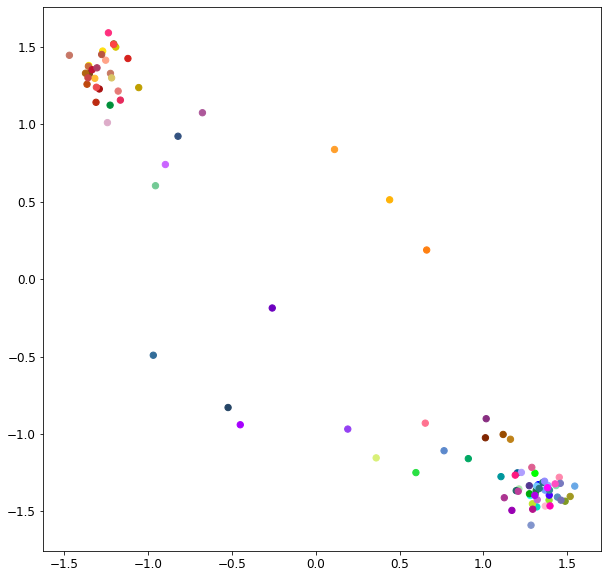

In [241]:
model_output = torch.load(os.path.join(model_dir, "best_npp_DMGI_NPP_1,NPP_2.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=1, annotation=True)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False)

### Results WITH attribute matrix X ... long run

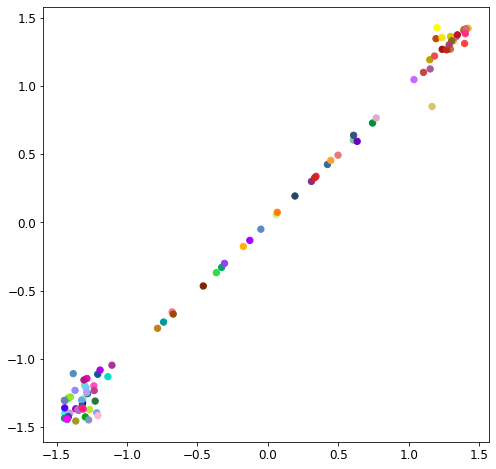

In [358]:
model_output = torch.load(os.path.join(model_dir, "best_npp_DMGI_NPP_1,NPP_2.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))

### Turn the NPP matrix to a binary matrix

In [308]:
new_df = np.zeros((93,93))
row, col = np.where(df>1.5)
for r, c in zip(row, col):
    new_df[r][c] = 1    

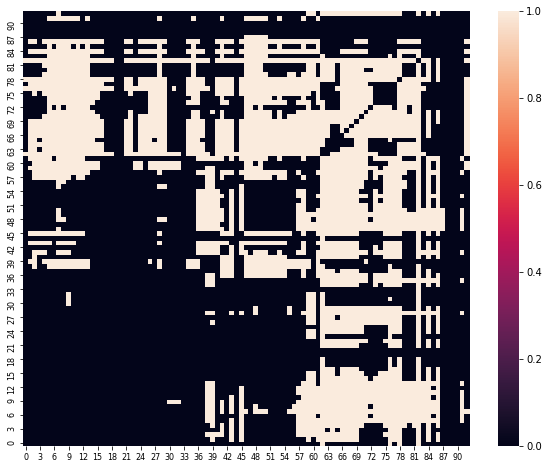

In [309]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(new_df)
ax.tick_params(labelsize=8)
ax.invert_yaxis()

In [310]:
data = {}
data['nppb_1'] = np.array(new_df)
data['nppb_2'] = np.array(new_df)
data['feature'] = np.array(FACS_cl_med)
data['train_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['test_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['val_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))

label = []
for i in range(len(select_cl)):
    for j in range(len(select_cl)):
        if i == j:
            label.append(1)
        else:
            label.append(0)
data['label'] = np.array(label).reshape(len(select_cl),len(select_cl))

In [311]:
data

{'nppb_1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'nppb_2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'feature': array([[6.84309700e-03, 3.59045550e-02, 5.96312900e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.29746200e-02, 0.00000000e+00, 6.69927542e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.78562430e-02, 0.00000000e+00, 6.47564018e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [4.78412650e-02, 5.07551300e-03, 5.64371599e+00, ...,
         0.00000000e+00, 0.00000000e

In [312]:
import pickle
with open('/Users/fahimehb/Documents/NPP_GNN_project/dat/nppb.pkl', 'wb') as handle:
    pickle.dump(data, handle)

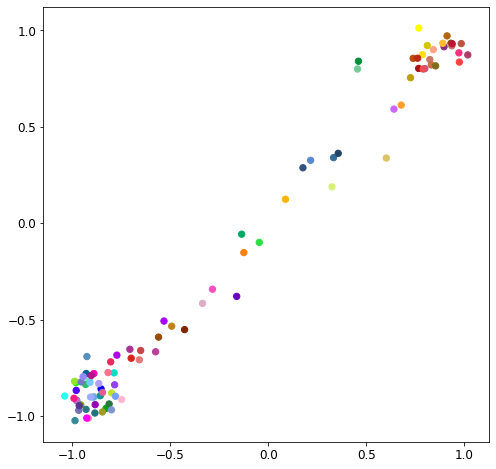

In [356]:
model_output = torch.load(os.path.join(model_dir, "best_nppb_DMGI_nppb_1,nppb_2.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))

### Lets take two different npp matrices and symmetrize them

In [331]:
jsd_new = jsd.reindex(select_cl)

In [334]:
jsd_new = jsd_new[select_cl]

In [338]:
data = {}
data['npp'] = np.array(df)
data['jsd'] = np.array(jsd_new)
data['feature'] = np.array(FACS_cl_med)
data['train_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['test_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['val_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))

label = []
for i in range(len(select_cl)):
    for j in range(len(select_cl)):
        if i == j:
            label.append(1)
        else:
            label.append(0)
data['label'] = np.array(label).reshape(len(select_cl),len(select_cl))

In [341]:
import pickle
with open('/Users/fahimehb/Documents/NPP_GNN_project/dat/npp_jsd.pkl', 'wb') as handle:
    pickle.dump(data, handle)

### With attributes

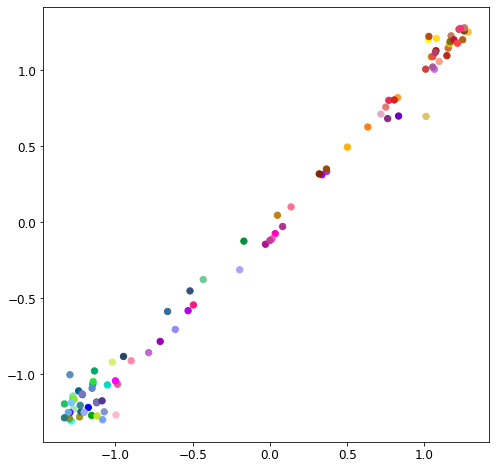

In [354]:
model_output = torch.load(os.path.join(model_dir, "best_npp_jsd_DMGI_npp,jsd.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))

### Without attributes

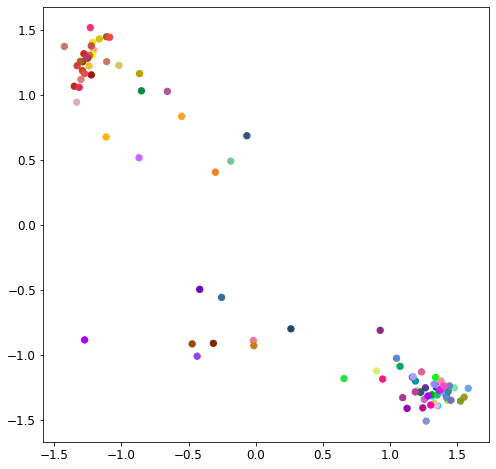

In [375]:
model_output = torch.load(os.path.join(model_dir, "best_npp_jsd_DMGI_npp,jsd.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))